In [1]:
#!pip install numpy
#!pip install pandas
#!pip install tensorflow

In [4]:
import pandas as pd
import os
# from PIL import Image
import numpy as np
import numpy as np
import random

import numpy as np
import pandas as pd



def getPacketData(key):
    df = pd.read_csv("C:\\Users\\HP\\Desktop\\Dataset\\crop_new.csv")
    print(df.head(100))
    All_action=df['Production']
    New_dataframe = df.drop( ["State_Name","Production"], axis=1)
    x=np.reshape(np.array(New_dataframe), (New_dataframe.shape[0], New_dataframe.shape[1], 1))
    print(x.shape)
    return x,All_action



In [5]:
Packet_name = 'crop_new'
x_data,y_data=getPacketData(Packet_name)

   State_Name  District_Name  Crop_Year  Season  Crop          Area  \
0      Kerala              0          4       0    18  1.581818e-05   
1      Kerala              0          4       2    18  2.795455e-05   
2      Kerala              0          4       3     0  1.836088e-06   
3      Kerala              0          4       3     2  3.539394e-05   
4      Kerala              0          4       3     3  1.331956e-06   
..        ...            ...        ...     ...   ...           ...   
95     Kerala              0          9       4    18  1.091047e-05   
96     Kerala              1          9       0    18  8.652893e-06   
97     Kerala              1          9       2    18  4.108815e-05   
98     Kerala              1          9       3     0  6.695592e-06   
99     Kerala              1          9       3     1  1.377410e-09   

     rainfall  mintemperature  maxtemperature    Production  
0   11.138136       31.068190       30.933333  1.581818e-05  
1    2.298169       32.

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2) # split data into train and test
print(x_train[0])
print(y_train[0])

[[0.00000000e+00]
 [6.00000000e+00]
 [3.00000000e+00]
 [5.00000000e+00]
 [1.92837466e-08]
 [7.83418075e+00]
 [3.12433205e+01]
 [3.07583333e+01]]
1.581818181818182e-05


In [9]:
import tensorflow as tf

LSTM_model = tf.keras.models.load_model("C:\\Users\\HP\\Desktop\\Dataset\model\\model.h5")
RNN_model = tf.keras.models.load_model("C:\\Users\\HP\\Desktop\\Dataset\\model\\model1.h5")

In [10]:
LSTM_model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 8, 1)]            0         
                                                                 
 lstm_17 (LSTM)              (None, 16)                1152      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 16)                0         
                                                                 
 flatten_21 (Flatten)        (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [11]:
RNN_model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 8, 1)]            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 8, 8)              80        
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 8, 8)              0         
                                                                 
 flatten_22 (Flatten)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


NameError: name 'history_lstm' is not defined

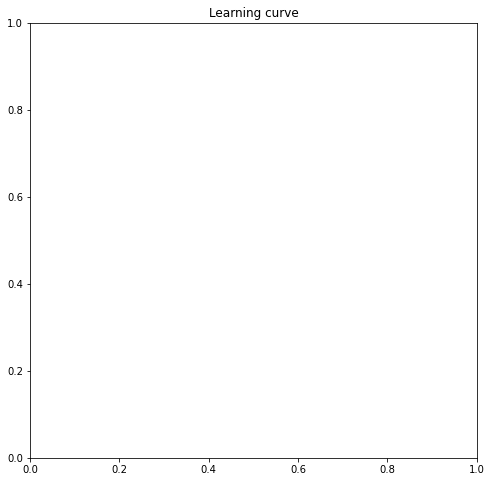

In [12]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history_lstm.history["loss"], label="LSTM loss")
plt.plot(history_RNN.history["loss"], label="RNN loss")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend()

In [13]:
from sklearn.metrics import mean_squared_error
y_pred=LSTM_model.predict(x_test)
Y_pred_Rnn=RNN_model.predict(x_test)

print('LSTM Mean Square Loss On test data',mean_squared_error(y_pred,y_test))
print('RNN Mean Square Loss On test data',mean_squared_error(Y_pred_Rnn,y_test))

LSTM Mean Square Loss On test data 8.6086544374755e-05
RNN Mean Square Loss On test data 0.0007902945695307398


In [14]:
y_pred=LSTM_model.predict(x_data)
Y_pred_Rnn=RNN_model.predict(x_data)

print('LSTM Mean Square Loss On Full data',mean_squared_error(y_pred,y_data))
print('RNN Mean Square Loss On Full data',mean_squared_error(Y_pred_Rnn,y_data))

LSTM Mean Square Loss On Full data 0.0004191131942694657
RNN Mean Square Loss On Full data 0.0009700964968287814


In [15]:
y_pred=LSTM_model.predict(x_train)
Y_pred_Rnn=RNN_model.predict(x_train)

print('LSTM Mean Square Loss On Train data',mean_squared_error(y_pred,y_train))
print('RNN Mean Square Loss On Train data',mean_squared_error(Y_pred_Rnn,y_train))

LSTM Mean Square Loss On Train data 0.0005040689649856763
RNN Mean Square Loss On Train data 0.0010159643171744495


In [16]:
loss_lstm = LSTM_model.evaluate(x_data, y_data, verbose=1)
print('LSTM evalution Loss',loss_lstm)

8/8 [==============================] - 0s 3ms/step - loss: 4.1911e-04
LSTM evalution Loss 0.00041911311564035714


In [17]:
loss_rnn = RNN_model.evaluate(x_data, y_data, verbose=2)
print('RNN evalution Loss',loss_rnn)

8/8 - 0s - loss: 9.7009e-04 - 160ms/epoch - 20ms/step
RNN evalution Loss 0.0009700945811346173


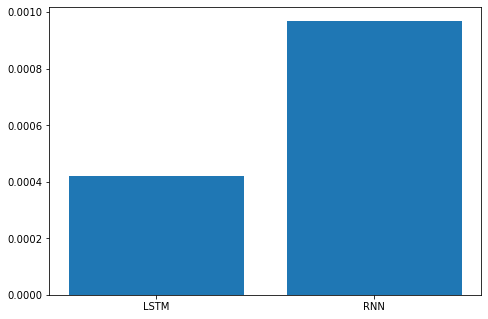

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0.5,1,1])
langs_mo = ['LSTM', 'RNN']
Coma_ = [loss_lstm,loss_rnn]
ax.bar(langs_mo,Coma_)
plt.show()